In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [3]:
loo = LeaveOneOut()
loo_scores = [] 

Leave-One-Out CV Accuracy: 98.96519285042334 %
Precision (macro) = 0.9871171572387212
Recall (macro) = 0.9793489907006984
F1-score (macro) = 0.9831991735349822
*******************


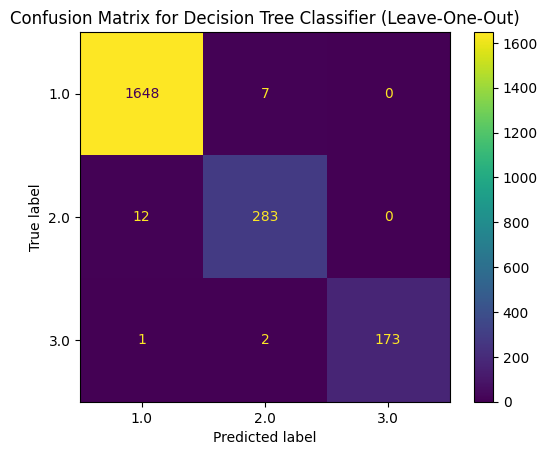

Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      1655
         2.0       0.97      0.96      0.96       295
         3.0       1.00      0.98      0.99       176

    accuracy                           0.99      2126
   macro avg       0.99      0.98      0.98      2126
weighted avg       0.99      0.99      0.99      2126



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)

loo_scores.append(y_pred[0] == y_test[0])


# Print accuracy
accuracy = accuracy_score(y, gradient_boosting.predict(X))

precision = precision_score(y, gradient_boosting.predict(X), average='macro')
recall = recall_score(y, gradient_boosting.predict(X), average='macro')
f1 = f1_score(y, gradient_boosting.predict(X), average='macro')
print("Leave-One-Out CV Accuracy:", accuracy * 100, "%")

print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)

print("*******************")

conf_matrix = confusion_matrix(y, gradient_boosting.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier (Leave-One-Out)')
plt.show()
class_report = classification_report(y, gradient_boosting.predict(X))
print("Classification Report:")
print(class_report)




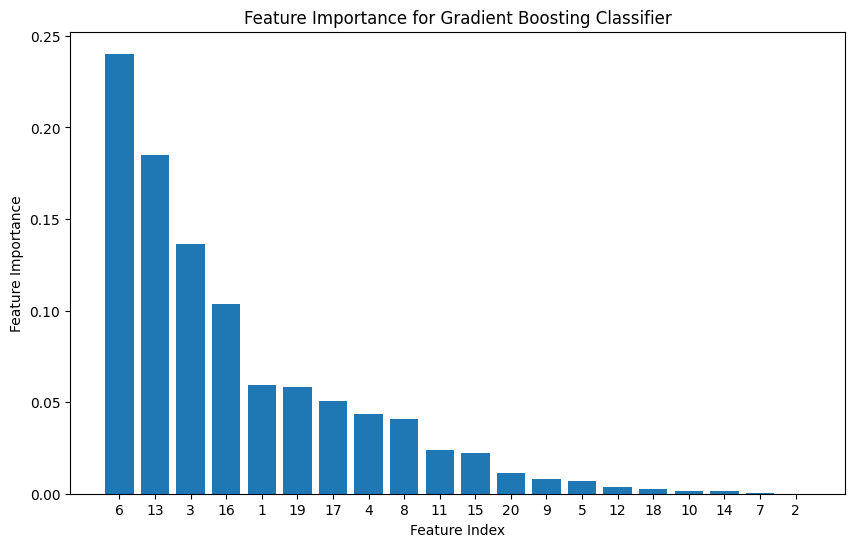

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generating some example data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
gb_classifier.fit(X_train, y_train)

# Getting feature importances
feature_importances = gb_classifier.feature_importances_

# Sorting features based on their importance
sorted_features_indices = feature_importances.argsort()[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()


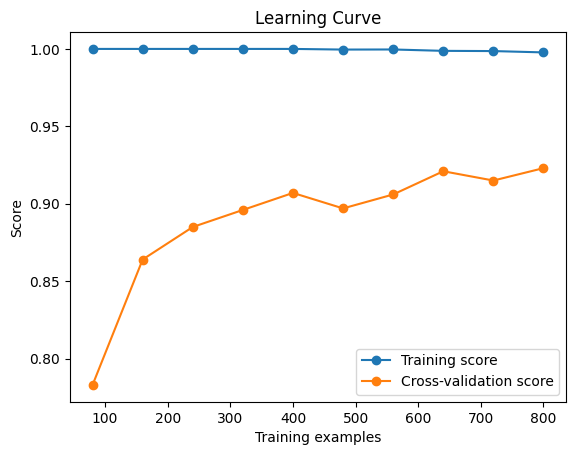

In [6]:
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()